In [3]:
library(Seurat)
install.packages("hdf5r")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [33]:
folder_path <- "/data2/ZenNa/DFU_Project/Data/SubSet_FootSkin"

In [34]:
# List all CSV files in the folder
csv_files <- list.files(path = folder_path, pattern = "\\.csv$", full.names = TRUE)
csv_files

[1] "/data2/ZenNa/DFU_Project/Data/SubSet_FootSkin/GSM5050522_Diabetic.csv"   
[2] "/data2/ZenNa/DFU_Project/Data/SubSet_FootSkin/GSM5050523_DFU- healer.csv"

In [38]:
# Load and preprocess each dataset
dataset1 <- read.csv("/data2/ZenNa/DFU_Project/Data/SubSet_FootSkin/GSM5050522_Diabetic.csv")
seurat_obj1 <- CreateSeuratObject(counts = dataset1, project = "Diabetic", min.cells = 3, min.features = 200)

In [39]:
dataset2 <- read.csv("/data2/ZenNa/DFU_Project/Data/SubSet_FootSkin/GSM5050523_DFU- healer.csv")
seurat_obj2 <- CreateSeuratObject(counts = dataset2, project = "DFU- healer", min.cells = 3, min.features = 200)

In [41]:
# Combine the datasets into a list
bm280k.list <- list(seurat_obj1, seurat_obj2)

In [42]:
bm280k.list <- lapply(X = bm280k.list, FUN = function(x) {
    x <- NormalizeData(x, verbose = FALSE)
    x <- FindVariableFeatures(x, verbose = FALSE)
})

# Next, select features for downstream integration, and run PCA on each object in the list, which is required for running the alternative reciprocal PCA workflow.

In [43]:
features <- SelectIntegrationFeatures(object.list = bm280k.list)
bm280k.list <- lapply(X = bm280k.list, FUN = function(x) {
    x <- ScaleData(x, features = features, verbose = FALSE)
    x <- RunPCA(x, features = features, verbose = FALSE)
})

In [44]:
anchors <- FindIntegrationAnchors(object.list = bm280k.list, reference = c(1, 2), reduction = "rpca",
    dims = 1:50)
bm280k.integrated <- IntegrateData(anchorset = anchors, dims = 1:50)

Warning message in CheckDuplicateCellNames(object.list = object.list):
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”
Computing 2000 integration features

Scaling features for provided objects

Computing within dataset neighborhoods

Finding anchors between all query and reference datasets

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 1214 anchors

Merging dataset 1 into 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data



In [45]:
bm280k.integrated <- ScaleData(bm280k.integrated, verbose = FALSE)
bm280k.integrated <- RunPCA(bm280k.integrated, verbose = FALSE)
bm280k.integrated <- RunUMAP(bm280k.integrated, dims = 1:50)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
22:25:10 UMAP embedding parameters a = 0.9922 b = 1.112

22:25:10 Read 4936 rows and found 50 numeric columns

22:25:10 Using Annoy for neighbor search, n_neighbors = 30

22:25:10 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

22:25:11 Writing NN index file to temp file /tmp/RtmprPQYWQ/file15e2f933711fde

22:25:11 Searching Annoy index using 1 thread, search_k = 3000

22:25:11 Annoy recall = 100%

22:25:12 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors

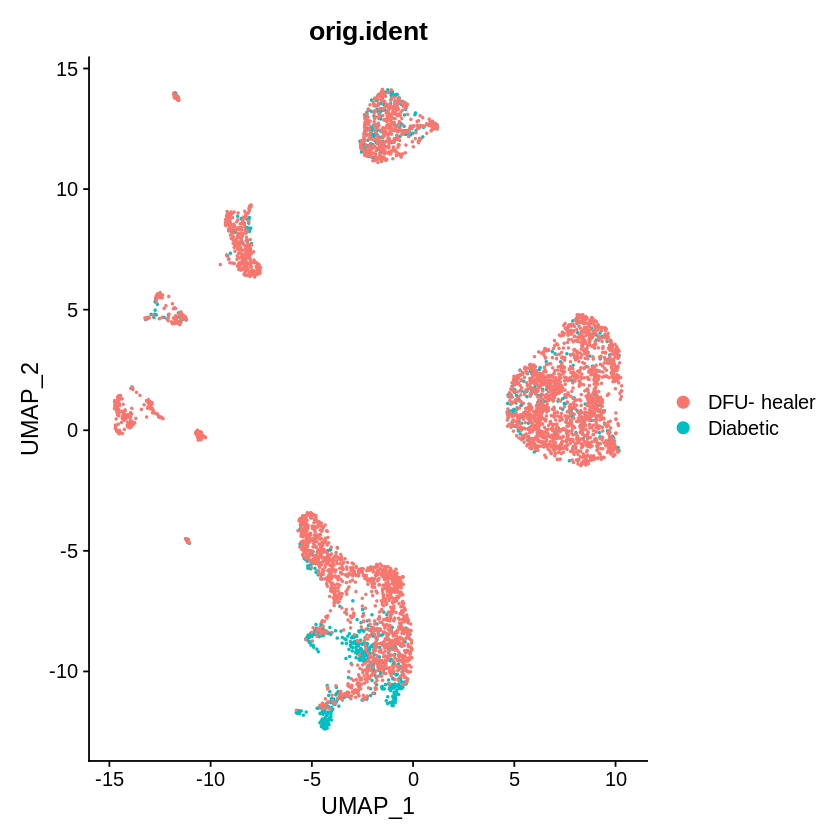

In [46]:
DimPlot(bm280k.integrated, group.by = "orig.ident")